In [0]:
#First, load packages
import pandas as pd


In [0]:
#Load the data
train = pd.read_csv("train.csv")
train_shape = train.shape
print(train_shape)

In [0]:
#Another way to look at the shape
train.shape

In [0]:
#To look at all the variables for the first 10 observations
train.head(10)

In [0]:
##Data exploration 1: Building Tables
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot

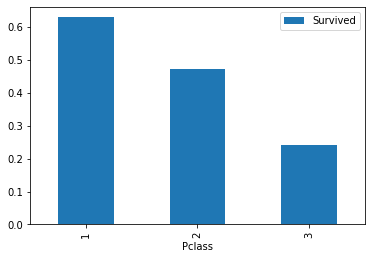

In [5]:
##Data exploration 2: Building bar charts
pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
# pclass_pivot
pclass_pivot.plot.bar()
plt.show()

In [6]:
##Data exploration 3: Descriptive statistics
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
##Data exploration 4: counts
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
##Creating dummy variables
column_name = "Pclass"
df = train
dummies = pd.get_dummies(df[column_name],prefix=column_name)
dummies.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [10]:
##Building a function to create dummy variables
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1


In [0]:
##Building a function and creating categorical variables 1
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train,cut_points,label_names)

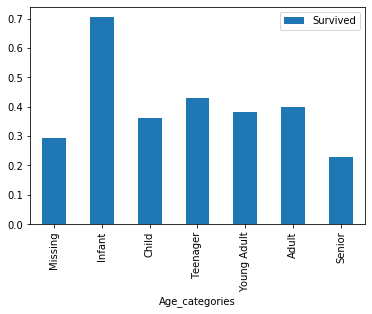

In [12]:
##Look at the categories you just made
age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

In [0]:
##Create dummies using the function you just made
train = create_dummies(train,"Sex")
train = create_dummies(train,"Age_categories")

In [14]:
##Let's see how the data looks now
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3,Age_categories,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1,Young Adult,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0,Adult,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1,Young Adult,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,Young Adult,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1,Young Adult,0,1,0,0,0,0,1,0,0


In [0]:
##package to create machine learning models
from sklearn.linear_model import LogisticRegression

In [0]:
##Create our data sets

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [17]:
##Fit our regression tree and produce an accuracy score
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
## How did we do?
accuracy

0.8100558659217877

In [19]:
## Cross validation scores
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [20]:
## All the scores
scores


array([0.8       , 0.81111111, 0.7752809 , 0.87640449, 0.80898876,
       0.78651685, 0.76404494, 0.76404494, 0.83146067, 0.80681818])

In [21]:
## This will be the final value we use to test with

np.mean(scores)

0.8024670865963002